<a href="https://colab.research.google.com/github/antidude900/Deep-Learning-Practise-Projects/blob/main/User_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Handwriting Recognition Program**


##**Setting and Cleaning Up the Data**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2979,8996-ZROXE,Male,1,No,No,57,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,Yes,Electronic check,53.50,3035.8,No
4777,7501-VTYLJ,Female,0,No,Yes,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,51.55,106.2,No
449,1090-ESELR,Male,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),105.50,7611.55,No
5583,2657-ALMWY,Female,1,Yes,No,26,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,84.95,2169.75,Yes
4358,6253-WRFHY,Male,0,Yes,Yes,13,Yes,No,DSL,No,...,No,No,Yes,Yes,One year,Yes,Electronic check,64.75,877.35,No


In [ ]:
data.drop('customerID',axis='columns',inplace=True)

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
pd.to_numeric(data.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
data =data[data.TotalCharges!=' ']

In [ ]:
data.TotalCharges = pd.to_numeric(data.TotalCharges)

In [ ]:
data.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [ ]:
def unique_col_values():
  for column in data:
    if data[column].dtypes == object:
      print(f"{column}={data[column].unique()}")

unique_col_values()

gender=['Female' 'Male']
Partner=['Yes' 'No']
Dependents=['No' 'Yes']
PhoneService=['No' 'Yes']
MultipleLines=['No phone service' 'No' 'Yes']
InternetService=['DSL' 'Fiber optic' 'No']
OnlineSecurity=['No' 'Yes' 'No internet service']
OnlineBackup=['Yes' 'No' 'No internet service']
DeviceProtection=['No' 'Yes' 'No internet service']
TechSupport=['No' 'Yes' 'No internet service']
StreamingTV=['No' 'Yes' 'No internet service']
StreamingMovies=['No' 'Yes' 'No internet service']
Contract=['Month-to-month' 'One year' 'Two year']
PaperlessBilling=['Yes' 'No']
PaymentMethod=['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn=['No' 'Yes']


In [ ]:
data.replace("No internet service","No",inplace=True)

In [ ]:
data.replace("No phone service","No",inplace=True)

In [ ]:
unique_col_values()

gender=['Female' 'Male']
Partner=['Yes' 'No']
Dependents=['No' 'Yes']
PhoneService=['No' 'Yes']
MultipleLines=['No' 'Yes']
InternetService=['DSL' 'Fiber optic' 'No']
OnlineSecurity=['No' 'Yes']
OnlineBackup=['Yes' 'No']
DeviceProtection=['No' 'Yes']
TechSupport=['No' 'Yes']
StreamingTV=['No' 'Yes']
StreamingMovies=['No' 'Yes']
Contract=['Month-to-month' 'One year' 'Two year']
PaperlessBilling=['Yes' 'No']
PaymentMethod=['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn=['No' 'Yes']


In [ ]:
yes_no_colums = [column for column in data if (data[column].dtypes==object and len(data[column].unique())==2)]

In [ ]:
for column in yes_no_colums:
  data[column].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
for column in data:
  print(f"{column}={data[column].unique()}")


gender=['Female' 'Male']
SeniorCitizen=[0 1]
Partner=[1 0]
Dependents=[0 1]
tenure=[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService=[0 1]
MultipleLines=[0 1]
InternetService=['DSL' 'Fiber optic' 'No']
OnlineSecurity=[0 1]
OnlineBackup=[1 0]
DeviceProtection=[0 1]
TechSupport=[0 1]
StreamingTV=[0 1]
StreamingMovies=[0 1]
Contract=['Month-to-month' 'One year' 'Two year']
PaperlessBilling=[1 0]
PaymentMethod=['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges=[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges=[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn=[0 1]


In [ ]:
data['gender'].replace({'Female':1,'Male':0},inplace=True)
data['gender'].unique()

array([1, 0])

In [ ]:
multi_object_columns = [column for column in data if (data[column].dtypes==object and len(data[column].unique())>2)]

In [ ]:
multi_object_columns

['InternetService', 'Contract', 'PaymentMethod']

In [ ]:
data = pd.get_dummies(data=data,columns = multi_object_columns)

In [ ]:
data.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6514,0,0,1,0,72,0,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
756,0,0,0,0,66,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2539,1,0,1,1,65,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
432,0,0,0,0,2,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
float_int_columns = multi_object_columns = [column for column in data if (data[column].dtypes==float or data[column].dtypes==int) and len(data[column].unique())>2]

In [ ]:
float_int_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[float_int_columns] = scaler.fit_transform(data[float_int_columns])

In [ ]:
for column in data:
  print(f"{column}={data[column].unique()}")


gender=[1 0]
SeniorCitizen=[0 1]
Partner=[1 0]
Dependents=[0 1]
tenure=[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService=[0 1]
MultipleLines=[0 1]
OnlineSecurity=[0 1]
OnlineBackup=[1 0]
DeviceProtection=[0 1]
TechSupport=[0 1]
Stream

In [ ]:
x = data.drop('Churn',axis='columns')
y = data['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

##**Making the Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(50,input_shape=(26,),activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')

])

model.compile(
    optimizer = 'adam',
    loss  = 'binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 9s 6ms/step - loss: 0.5192 - accuracy: 0.7351
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4577 - accuracy: 0.7716
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4487 - accuracy: 0.7865
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4467 - accuracy: 0.7844
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4373 - accuracy: 0.7918
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4364 - accuracy: 0.7970
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4281 - accuracy: 0.7988
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4316 - accuracy: 0.7924
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4238 - accuracy: 0.8032
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4260 - accura

In [ ]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.7875


[0.44900253415107727, 0.7874911427497864]

In [ ]:
y_p = model.predict(x_test)


44/44 [==============================] - 0s 2ms/step


In [ ]:
y_pred= []

for p in y_p:

  if p >=0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

##**Visually Ayalyzing The Prediction**


Text(95.72222222222221, 0.5, 'Truth')

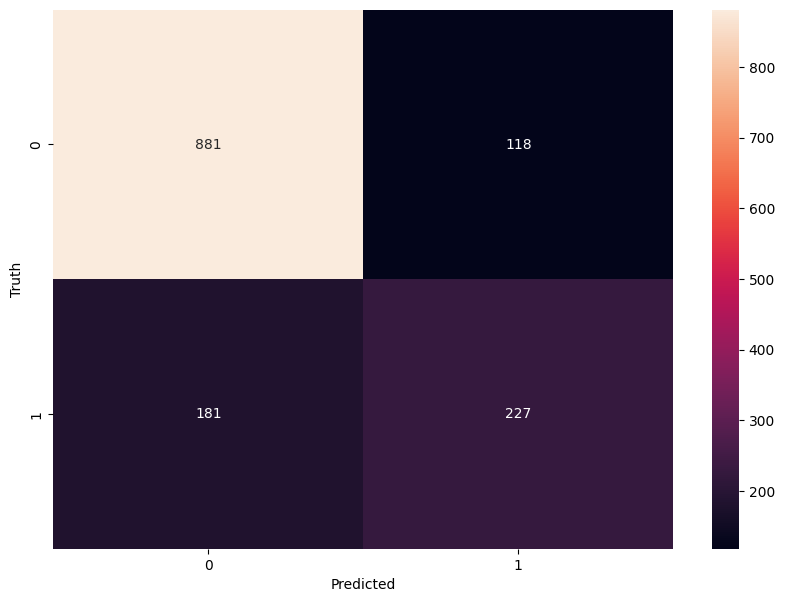

In [ ]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")